## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
url = 'https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv'
data = pd.read_csv(url)
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
for col in data:
    print(f"{col}: {data[col].unique()}")
data.info()
#количественные признаки: duration, amount, age - определил по типу данных
#бинарные признаки: people_liable, telephone, foreign_workers, credit_risk - понял по количеству вариантов значений
#порядковые признаки: status (no checking account можно признать самым малым значением в силу того, что для нашей
#                     задачи отсутствие счета является признаком того, что в данном банке у клиента 0 ден. ед.), 
#                     savings (аналогично: unknown/no saving account будет означать, что клиента на накопительном 
#                     счёте 0 ден. ед в данном банке), employment_duration (unemployed = 0 продолжительность работы),
#                     installment_rate, present_residence,
                    # number_credits - значения данных признаков представляют из себя некоторые диапозоны, которые сравнимы между собой
#категориальный признаки: credit_history, purpose, personal_status_sex,
                    # other_debtors, property, housing, job, other_installment_plans - несравнимые текстовые значения, которых больше 2 для каждого признака

status: ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
duration: [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
credit_history: ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
purpose: ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
amount: [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
ans1 = len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30]) * 100
ans2 = len(data[(data['age'] > 40) & (data['housing'] == 'rent')]) / len(data[data['age'] > 40]) * 100
print(f'{int(ans1)}% people under 30 rent house')
print(f'{int(ans2)}% people over 40 rent house')


66% people under 30 rent house
68% people over 40 rent house


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [8]:
len(data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '6'))])

1

### Задание 6 (1 балл)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

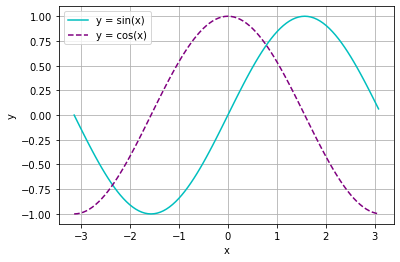

In [10]:
x = np.arange(-np.pi, np.pi, np.pi/50)
y = np.sin(x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(x, y, 'c')
y = np.cos(x)
plt.plot(x, y, 'purple', linestyle='dashed')
plt.legend(['y = sin(x)', 'y = cos(x)'])
# Просили вывод по каждому графику - окей: видим, что функции синус и косинус имеют равные значения со смещенем аргумента на pi/2

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

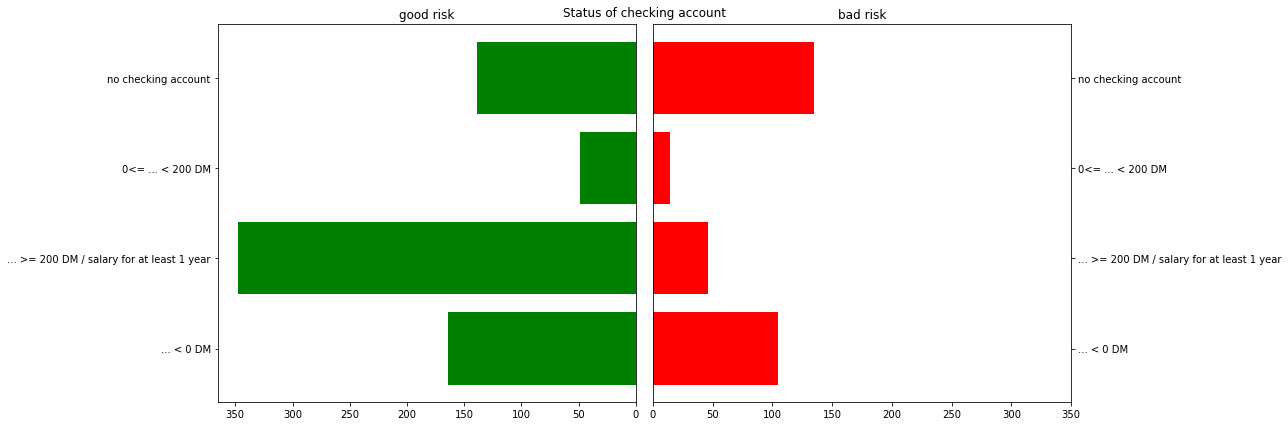

In [11]:
df = data.groupby(["status", "credit_risk"])['job'].count().unstack()
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))
axes[0].barh(df.index, df.good, color='g')
axes[0].invert_xaxis()
axes[1].barh(df.index, df.bad, color='r')
axes[1].yaxis.tick_right()
axes[0].set_title("good risk")
axes[1].set_title("bad risk")
fig.suptitle("Status of checking account")
plt.xlim([0, 350])
fig.tight_layout()
# Вывод: у проверенных клиентов в целом ниже риск не возврата долга, чем у непроверенных, кроме того, люди с зарплатой более 200 DM больше всех берут кредитов и вероятно имеют меньший риск не вернуть

### Задание 8  (0.5 балла)

In [12]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

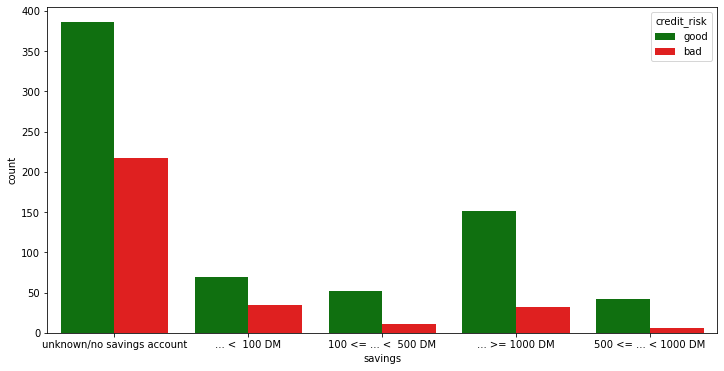

In [13]:
# Вывод по графику: аналогичный с прошлым (они идентичные)
# Как с точки зрения трудоемкости написания кода, так и с точки зрения восприятия результата
plt.figure(figsize=(12,6))
sns.countplot(x="savings", data=data, hue="credit_risk", palette=['g', 'r'])

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

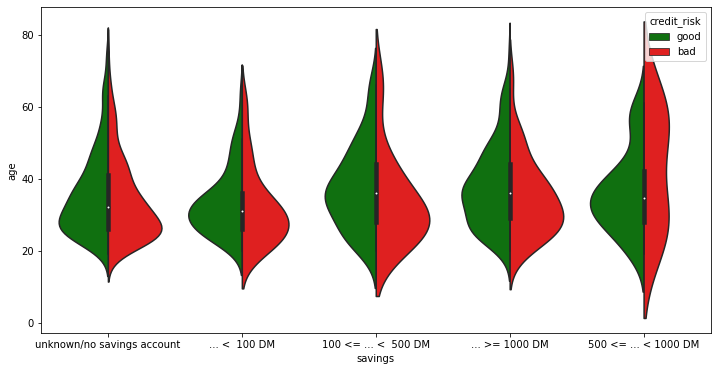

In [14]:
# Вывод: для каждого уровня сбережений видим, что большинство положительных кейсов у людей с возрастом между 20 и 40, кроме того, максимум отрицательных кейсов тоже находится в этом диапазоне, но точка максимума меньше, чем для положительных (то есть люди моложе). Также аидим, что у людей с уровнем сбережений 500 - 1000 DM диапазон плохого рейтинга по возрасту составляет 25-55 лет (самый продолжительный)
# В итоге, видим, что чем меньше сбережений, тем ниже матожидание возраста успешных кейсов. Если возраст объекта ниже матожидания успешного кейса, значит он скорее отрицательный.
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True, palette={"good": "g", "bad": "r"})

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

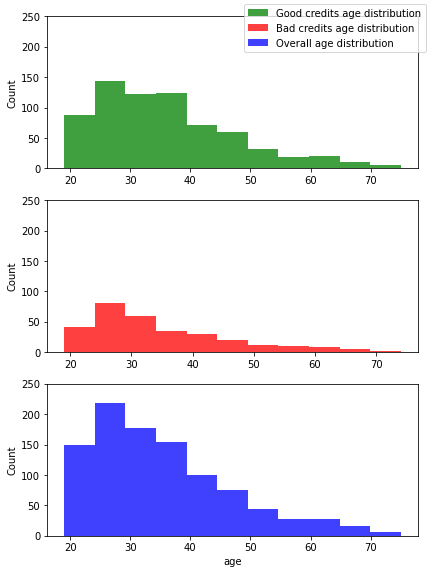

In [15]:
# Выводы: Распределение положительных кейсов по возрасту не сильно отличается от распределения всех кейсов, а отрицательных - отличается: среднее у него меньше.
fig, axes = plt.subplots(nrows=3, figsize=(6, 8))
plt.rcParams['patch.edgecolor'] = 'none'
sns.histplot(x="age", data=data, ax=axes[2], color="b", bins=11).set(ylim=(0,250))
sns.histplot(x="age", data=data[data["credit_risk"] == "good"], color="g", ax=axes[0], bins=11).set(ylim=(0,250))
sns.histplot(x="age", data=data[data["credit_risk"] == "bad"], color="r", ax=axes[1], bins=11).set(ylim=(0,250))
for ax in axes[0:2]:
    ax.set_xlabel('')
fig.tight_layout()
fig.legend(["Good credits age distribution", "Bad credits age distribution", "Overall age distribution"])

In [16]:
#!pip install seaborn --upgrade

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

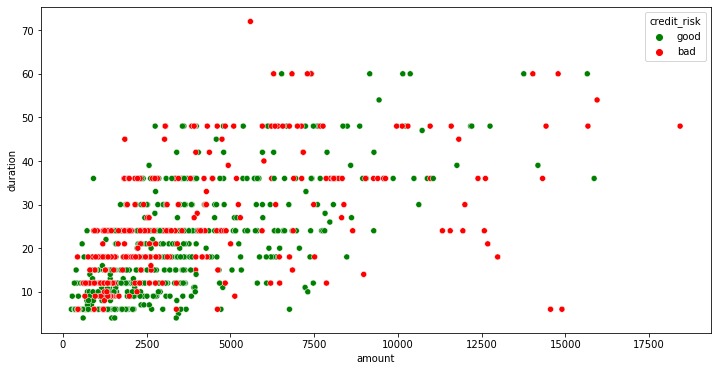

In [17]:
# Вывод: размер кредита и его срок не делают четкого разбиения обектов на 2 класса
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette={"good": "g", "bad": "r"})

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

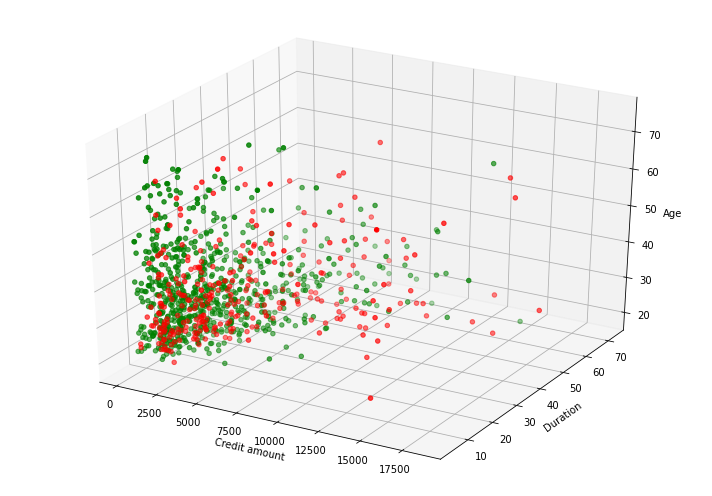

In [18]:
# Вывод: при учете возраста, размера кредита и его срока, видно, что положительные кейсмы преобладают в области с суммой кредита менее 2500, сроком от 10 до 50 и возрастом от 30 до 70
# from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection = '3d')
# ax = Axes3D(fig)

for risk, c in (("bad", 'r'), ("good", 'g')):
    x = data[data['credit_risk'] == risk]['amount']
    y = data[data['credit_risk'] == risk]['duration']
    z = data[data['credit_risk'] == risk]['age']
    ax.scatter(x, y, z, color=c)

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
fig.tight_layout()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [19]:
replaced = 0

In [20]:
#people_liable, telephone, foreign_workers, credit_risk
#порядковые признаки: status (если отбросить неизвестный), savings, 
                    # employment_duration, installment_rate, present_residence,
                    # number_credits
replacing_values = {
    "status": {"no checking account": 0, "... < 0 DM": 1,
                               "0<= ... < 200 DM": 2,
                               "... >= 200 DM / salary for at least 1 year": 3},
    "savings": {"unknown/no savings account": 0, "... <  100 DM": 1,
               "100 <= ... <  500 DM": 2, "500 <= ... < 1000 DM": 3,
               "... >= 1000 DM": 4},
    "employment_duration": {"unemployed": 0, "< 1 yr": 1, "1 <= ... < 4 yrs": 2,
                           "4 <= ... < 7 yrs": 3, ">= 7 yrs": 4},
    "installment_rate": {"< 20": 0, "20 <= ... < 25": 1, "25 <= ... < 35": 2,
                        ">= 35": 3},
    "present_residence": {"< 1 yr": 0, "1 <= ... < 4 yrs": 1,
                         "4 <= ... < 7 yrs": 2, ">= 7 yrs": 3},
    "number_credits": {"1": 0, "2-3": 1, "4-5": 2, ">= 6": 3}
    
}
if replaced == 0:
    replaced = 1
    data["people_liable"] = (data["people_liable"] == "3 or more").astype(int)
    data["telephone"] = (data["telephone"] != "no").astype(int)
    data["credit_risk"] = (data["credit_risk"] == "good").astype(int)
    data["foreign_worker"] = (data["foreign_worker"] == "yes").astype(int)
    data.replace(replacing_values, inplace=True)

In [21]:
#категориальный признаки: credit_history, purpose, personal_status_sex,
                    # other_debtors, property, housing, job, other_installment_plans
data.drop(["credit_history", "purpose", "personal_status_sex", "other_debtors", "property", "housing", "job", "other_installment_plans"], axis=1, inplace=True)
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,1,0,0,1
2,1,12,841,1,3,2,3,23,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,3,38,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [22]:
# kNN реализация (показал результат 0,67 при 60 соседях, после преобразования данных - 0,712 при 5 соседях)
class TrainObjects:
    Xtrain = np.array([])
    ytrain = np.array([])
    k = 1
    
    @staticmethod
    def setXy(X, y):
        TrainObjects.Xtrain = X
        TrainObjects.ytrain = y
        
    @staticmethod
    def get_X():
        return TrainObjects.Xtrain
    
    @staticmethod
    def get_y():
        return TrainObjects.ytrain
    
    @staticmethod
    def get_k():
        return TrainObjects.k
    
    @staticmethod
    def setk(a):
        TrainObjects.k = a

def classifier(knn, k):
    if knn.sum() >= k/2:
        return 1
    elif knn.sum() < k/2:
        return 0
    
def prepare_data(X):
    age_correction = (X[:, 7] - X[:, 7].mean())/X[:, 7].std()
    per_month = X[:, 2] / X[:, 1]
    per_month = -(per_month - per_month.min())/per_month.std() - 1
    reliability = (1 + X[:, 6]) * (1 + X[:, 9]) * (1 + X[:, 10])
    foreign_worker = -X[:, 11]
    security = (1 + X[:, 0]) * (1 + X[:, 3]) * (1 + X[:, 4]) * (1 + X[:, 8])
    installment_rate = -X[:, 5]
    return np.stack((age_correction, per_month, reliability, foreign_worker, security, installment_rate), axis=1)
        
def predict1(Xtest: np.array) -> np.array:
    n = Xtest.shape[0]
    classes = []
    Xtest = prepare_data(Xtest)
    Xtrain = TrainObjects.get_X()
    k = TrainObjects.get_k()
    if Xtrain.shape[0] == 0:
        print(Xtrain)
        return np.array([1]*n)
    for i in range(n):
        ytrain = TrainObjects.get_y()
        knn = ytrain[np.argsort(np.linalg.norm(Xtrain - Xtest[i, :], axis=1))][:k]
        classes.append(classifier(knn, k))
    return np.array(classes)

def fit(X, y, k):
    TrainObjects.setXy(prepare_data(X), y)
    TrainObjects.setk(k)

In [23]:
def predict(Xtest: np.array) -> np.array:
    # age_correction
    a = 0.8
    # per_month
    b = 1.1
    # reliability
    c = 1.2
    # foreign_worker
    d = 1.4
    # security
    e = 1.3
    # installment_rate
    f = 1.2
    # params for age
    g = 0.62
    h = 4
    # cutting edge
    i = 0
    age_correction = Xtest[:, 7] - g * Xtest[:, 7].std() - Xtest[:, 7].mean()
    age_correction[age_correction > 0] = 0
    too_old = h * Xtest[:, 7].std() + Xtest[:, 7].mean() - Xtest[:, 7]
    too_old[too_old > 0] = 0
    age_correction += too_old
    per_month = Xtest[:, 2] / Xtest[:, 1]
    per_month = -(per_month - per_month.min())/per_month.std() - 1
    reliability = (1 + Xtest[:, 6]) * (1 + Xtest[:, 9]) * (1 + Xtest[:, 10])
    foreign_worker = -Xtest[:, 11]
    X_test[:, 8] = X_test[:, 8] + 2
    X_test[:, 8][X_test[:, 8] == 2] = 0
    X_test[:, 8][X_test[:, 8] == 3] = 1
    security = (1 + Xtest[:, 0]) * (1 + Xtest[:, 3]) * (1 + Xtest[:, 4]) * (1 + Xtest[:, 8])
    installment_rate = -Xtest[:, 5]
    y_pred = a * age_correction + b * per_month + c * reliability + d * foreign_worker + e * security + f * installment_rate
    return (y_pred > i).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Построим модель по принципу линейной регрессии, но с преобразованием признаков:
#     1) Для начала учтём опыт разведовательного анализа - будем штрафовать за большое отклонение возраста от
#     среднего, причём тех, кто моложе будем штрафовать сильнее тех, кто старше. Данный параметр назовём
#     age_correction.
#     2) Кажется очевидным, что сумма, которую необходимо выплачивать ежемесячно сильно коррелирует с риском -
#     учтём это в признаке per_month, который будет означать во сколько стандартных отклонений отклоняется эта
#     сумма для объекта от (минимальная + стандартное отклонение)
#     3) Следующим новым признаком станет reliability - надежность объекта, которую вычислим как произведение
#     порядковых признаков  people_liable, telephone, present_residence - чем надежнее объект, тем выше это
#     значение (при этом, добавим к каждому множителю 1, чтобы не обнулять объекты с одним 0, но высокими другими
#     значениями). Предположим, наличие зарегистрированного номера и то, что клиент уже пользовался услугами банка 
#     - положительно коррелируют с низким риском.
#     4) В случае иностранных граждан существуют определенные риски: будем вычитать значение признака foreign_worker.
#     С иностранцев тяжелее взыскать долг, это может побудить его не выплачивать кредит.
#     5) Введем признак security - обеспеченность кредита, как произведение значений status, savings, 
#     employment_duration, number_credits*. Аналогично добавим к значениям 1, чтобы не происходило обнуления.
#     В данном случае большое число кредитов в данном банке свидетельствует о том, что банк может доверять клиенту.
#     * - гипотеза будет сначала проверена, возможны корректировки.
#  UPD: из значений признака number_credits вычтем 1
#     6) Вычтем признак installment_rate  - так как чем больше процент рассрочки от заработка, тем выше риск не
#     отдать кредит.
# Для каждый признак будет добавляться в сумму с коэффициентом, который нормализует итог. Построим график разброса
# классов по сумме и определим значение для отсечения.

# * - проверим гипотезу:
# for i in range(4):
#     print("number_credits = i:", len(X[:, 8][(y == 0) & (X[:, 8] == i)]), ' bad\n')
#     print("number_credits = i:", len(X[:, 8][(y == 1) & (X[:, 8] == i)]), ' good\n')
def train(Xtest):
    # age_correction
    a = 0.8
    # per_month
    b = 1.1
    # reliability
    c = 1.2
    # foreign_worker
    d = 1.4
    # security
    e = 1.3
    # installment_rate
    f = 1.2
    # params for age
    g = 0.62
    h = 4
    # cutting edge
    i = 0
    age_correction = Xtest[:, 7] - g * Xtest[:, 7].std() - Xtest[:, 7].mean()
    age_correction[age_correction > 0] = 0
    too_old = h * Xtest[:, 7].std() + Xtest[:, 7].mean() - Xtest[:, 7]
    too_old[too_old > 0] = 0
    age_correction += too_old
    per_month = Xtest[:, 2] / Xtest[:, 1]
    per_month = -(per_month - per_month.min())/per_month.std() - 1
    reliability = (1 + Xtest[:, 6]) * (1 + Xtest[:, 9]) * (1 + Xtest[:, 10])
    foreign_worker = -Xtest[:, 11]
    security = (1 + Xtest[:, 0]) * (1 + Xtest[:, 3]) * (1 + Xtest[:, 4]) * (1 + Xtest[:, 8])
    installment_rate = -Xtest[:, 5]
    y_pred = a * age_correction + b * per_month + c * reliability + d * foreign_worker + e * security + f * installment_rate
#     Раскомментить ретерн, закоментить второй, чтобы посмотреть разбивку (раскомментировать снизу plt.scatter тоже нужно)
    #return (y_pred)
    return (y_pred > i).astype(int)
# Для проверки kNN (переменная и цикл):
best = 0
kopt = 0
for k in range(1, 200):
    fit(X_train, y_train, k)
    res = accuracy_score(y_test, predict1(X_test))
    if res > best:
        best = res
        kopt = k
fit(X_train, y_train, kopt)
print(f"for k={kopt} accuracy={accuracy_score(y_test, predict1(X_test))}")
# plt.scatter(train(X_train), y_train)
# print(accuracy_score(y_train, train(X_train)))
accuracy_score(y_test, predict(X_test))

for k=5 accuracy=0.712


0.708